## Table of Content
 **[Mid-term Project:Supervised Machine Learning](#Mid-term-Project-:-Supervised-Machine-Learning)**
 
 
 <p>The focus of the task is to build predictive models which can identify which employees are at a higer risk of leaving the company. This could help in taking some proactive measures to retain valuable employees. This dataset is collected for a Human resource application and the source is from Kaggle: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition  
    
    Attrition: Represents the measure of employee leave a company voluntorily or involuntorily. HR uses the figure to track and understand how things are going at a company


##  Load Code Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

/home/manny/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Part 2: Load Dataset

<p>      </p>

In [2]:
PATH = r'C:\Users\Acer\Downloads\archive (2)\HR EmployeeAttrition.csv'

#PATH = r'D:\mlzoomcamp\midterm-project\hr\HREmployeeAttrition.csv'


df = pd.read_csv('HREmployeeAttrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


##  Load Dataset Summary
<p>      </p>

## Prepare Data

<p>      </p>

* Check for missing values
* Check for Duplicates, and 
* Check for outliers in the dataset. 
* Finally, address any data quality issues.

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [4]:
df.columns # Examining all the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.nunique()

age                           43
attrition                      2
businesstravel                 3
dailyrate                    886
department                     3
distancefromhome              29
education                      5
educationfield                 6
employeecount                  1
employeenumber              1470
environmentsatisfaction        4
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1349
monthlyrate                 1427
numcompaniesworked            10
over18                         1
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
standardhours                  1
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifeba

In [8]:
# Drop all constant attributes (1 from the result about) that will not make difference to our model discription
df.drop(['employeecount', 'over18','standardhours' ],axis=1,inplace=True)


In [9]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [10]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

categorical_columns

['attrition',
 'businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'overtime']

In [11]:
df.head().T # Dataset exhibit some standardisation - Changed all columns and categorical values into lowercase, 
            # and collected all categorical attributes in an holder variable.

,0,1,2,3,4
age,41,49,37,33,27
attrition,yes,no,yes,no,no
businesstravel,travel_rarely,travel_frequently,travel_rarely,travel_frequently,travel_rarely
dailyrate,1102,279,1373,1392,591
department,sales,research_&_development,research_&_development,research_&_development,research_&_development
distancefromhome,1,8,2,3,2
education,2,1,2,4,1
educationfield,life_sciences,life_sciences,other,life_sciences,medical
employeenumber,1,2,4,5,7
environmentsatisfaction,2,3,4,4,1


In [12]:
df.attrition = (df.attrition == 'yes').astype(int)
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,travel_rarely,1102,sales,1,2,life_sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,travel_frequently,279,research_&_development,8,1,life_sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,travel_rarely,1373,research_&_development,2,2,other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,travel_frequently,1392,research_&_development,3,4,life_sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,travel_rarely,591,research_&_development,2,1,medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,travel_frequently,884,research_&_development,23,2,medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,travel_rarely,613,research_&_development,6,1,medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,travel_rarely,155,research_&_development,4,3,life_sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,travel_frequently,1023,sales,2,3,medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [13]:
df.describe() # Descriptive Statistics: Calculate summary statistics for numeric variables such as age, distance, from home, and others. 
              # This gives the statistical overview of the dataset.
    # Count:1470 entries or examples, if any attribute has a different count value,can imply a missed data in our dataset. 

,age,attrition,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


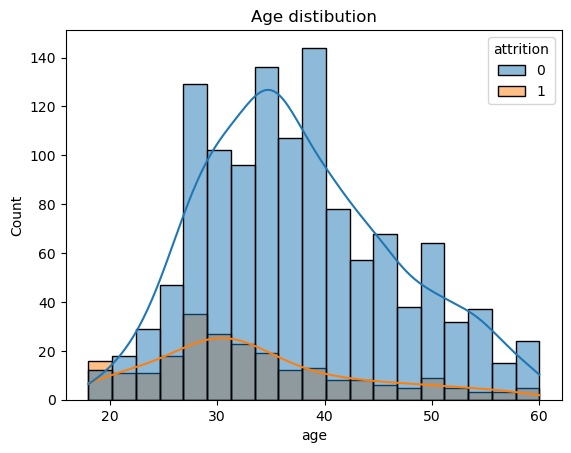

In [14]:
sns.histplot(data=df,x='age',hue='attrition',kde=True)
plt.title(label='Age distibution')
plt.show();

# Start and Retirement ages are the focus here 

## Summary: Prepare Data 

* Minimum start Age is 18
* Retirement Age is 60
* Attrition seemed to occur with younger age ranging from 18
* Observed a peak at age 30.
* Declining move from age 40 through to ago 60, which seems like the retirement age.
* Plot of 2 graphs campared indicates an imbalanced Class data as it seems proportion of employees leaving is low compared to those that stay perphaps until retirement age.

## Validation Framework
* Perform the train/validation/test split with Scikit-Learn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [17]:
len(df_train), len(df_val), len(df_test)

(882, 294, 294)

In [18]:
len(df_full_train)

1176

In [19]:
 df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

In [21]:
len(y_train), len(y_val), len(y_test), 

(882, 294, 294)

In [22]:
len(df_full_train)

1176

In [23]:
 df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

## Part 5: Exploratory Data Analysis

<p>      </p>

* Perform EDA on the training Dataset
* Look at the target variable (attrition)
* Look at numerical and categorical variables

In [25]:
df_full_train = df_full_train.reset_index(drop=True)


In [26]:
df_full_train.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssincelastpromotion     0
yearswithcurrmanager        0
dtype: int64

In [27]:
df_full_train.yearsincurrentrole


0       1
1       0
2       2
3       4
4       8
       ..
1171    9
1172    2
1173    0
1174    3
1175    0
Name: yearsincurrentrole, Length: 1176, dtype: int64

In [28]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1176 non-null   int64 
 1   attrition                 1176 non-null   int64 
 2   businesstravel            1176 non-null   object
 3   dailyrate                 1176 non-null   int64 
 4   department                1176 non-null   object
 5   distancefromhome          1176 non-null   int64 
 6   education                 1176 non-null   int64 
 7   educationfield            1176 non-null   object
 8   employeenumber            1176 non-null   int64 
 9   environmentsatisfaction   1176 non-null   int64 
 10  gender                    1176 non-null   object
 11  hourlyrate                1176 non-null   int64 
 12  jobinvolvement            1176 non-null   int64 
 13  joblevel                  1176 non-null   int64 
 14  jobrole                 

In [29]:
# df_full_train.attrition.value_counts(normalize=True) # Heads up for imbalance target value
df_full_train.attrition.value_counts()

attrition
0    978
1    198
Name: count, dtype: int64

In [30]:
global_mean = df_full_train.attrition.mean() # Global attrition rate is calulated by the mean value on the training dataset
global_mean

0.1683673469387755

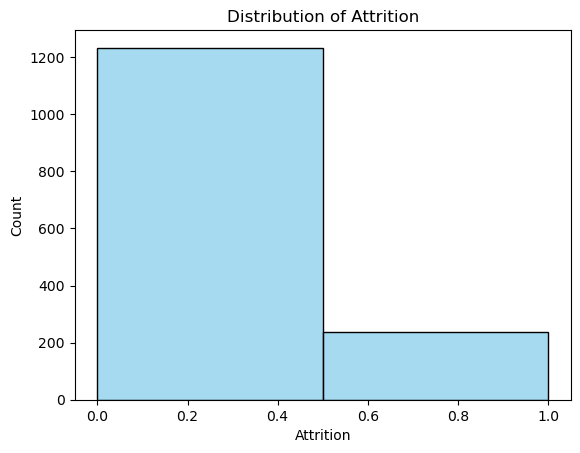

In [31]:
# Create a histogram of the 'Attrition' target variable
sns.histplot(data=df, x='attrition', bins=2, kde=False, color='skyblue')

# Add labels and a title to the plot
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition')



# Show the plot
plt.show();

Approximately, 17% of the workforce had left as seen in the training data. The proportion can be refered to as Attrition rate. This is case of imbalanced dataset. Which means the positive and negative classes were not equally distribution. It is a good thing but in a desireable condition is to have the ratio lower otherwise, there is no need to attempt to solve the problem using machine learning.

From the analysis above it seems more people (1233) stay on job than people (236) who leave. Therefore, it is a case of data imbalance for this classification problem. Furthermore, there could be different reasons for these 236 people who have left the company

In [32]:
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,travel_rarely,1102,sales,1,2,life_sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,travel_frequently,279,research_&_development,8,1,life_sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,travel_rarely,1373,research_&_development,2,2,other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,travel_frequently,1392,research_&_development,3,4,life_sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,travel_rarely,591,research_&_development,2,1,medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,travel_frequently,884,research_&_development,23,2,medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,travel_rarely,613,research_&_development,6,1,medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,travel_rarely,155,research_&_development,4,3,life_sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,travel_frequently,1023,sales,2,3,medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [33]:
numerical_columns = list(df_full_train.dtypes[df.dtypes == 'int64'].index)
numerical_columns

['age',
 'attrition',
 'dailyrate',
 'distancefromhome',
 'education',
 'employeenumber',
 'environmentsatisfaction',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

In [34]:
categorical_columns = list(df_full_train.dtypes[df.dtypes == 'object'].index)
categorical_columns

['businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'overtime']

In [35]:
df_full_train[categorical_columns].nunique() # Observe all types that exists for each categorical variable

businesstravel    3
department        3
educationfield    6
gender            2
jobrole           9
maritalstatus     3
overtime          2
dtype: int64

In [36]:
df_full_train.businesstravel.value_counts()

businesstravel
travel_rarely        835
travel_frequently    228
non-travel           113
Name: count, dtype: int64

## Feature Importance

* Section helps to know how variable affects the target variable, Attrition
* Knowledge of this is key to gaining more understanding of the Attrition Dataset
* Also aids building of a good model
* There are two categories in the dataset, Categorical and numerical variables
*  Feature importance and mutual information are two different approaches to selecting relevant features for a machine learning model
* Each variable employs different methods to determine feature importance 
* The Feature importance is useful for identifying variables that have varying impact across different subgroups


### Risk Ratios
* Calculate the Attrition Global against the Attrition Group Ratio

In [37]:
from IPython.display import display

In [38]:
for col in categorical_columns:
    df_group = df_full_train.groupby(by=col).attrition.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
businesstravel,,,
non-travel,0.079646,-0.088721,0.473049
travel_frequently,0.254386,0.086019,1.510898
travel_rarely,0.156886,-0.011481,0.931809


,mean,diff,risk
department,,,
human_resources,0.200000,0.031633,1.187879
research_&_development,0.143791,-0.024576,0.854031
sales,0.216066,0.047699,1.283304


,mean,diff,risk
educationfield,,,
human_resources,0.272727,0.104360,1.619835
life_sciences,0.152749,-0.015618,0.907239
marketing,0.217742,0.049375,1.293255
medical,0.146341,-0.022026,0.869180
other,0.159420,-0.008947,0.946860
technical_degree,0.247525,0.079157,1.470147


,mean,diff,risk
gender,,,
female,0.151386,-0.016981,0.899141
male,0.179632,0.011265,1.066907


,mean,diff,risk
jobrole,,,
healthcare_representative,0.047619,-0.120748,0.282828
human_resources,0.238095,0.069728,1.414141
laboratory_technician,0.250000,0.081633,1.484848
manager,0.050633,-0.117734,0.300729
manufacturing_director,0.065421,-0.102947,0.388558
research_director,0.029412,-0.138956,0.174688
research_scientist,0.177686,0.009319,1.055347
sales_executive,0.177165,0.008798,1.052255
sales_representative,0.413333,0.244966,2.454949


,mean,diff,risk
maritalstatus,,,
divorced,0.097378,-0.070989,0.578368
married,0.127273,-0.041095,0.755923
single,0.284123,0.115755,1.687516


,mean,diff,risk
overtime,,,
no,0.101553,-0.066814,0.603164
yes,0.333333,0.164966,1.979798


Almost all the categorical variables seem like one or more sub-level have higher risk values compared to their respective group ratio. Therefore, all the variables will have to feature in building the model. Perhaps, need to re-consider at a later stage.

## Mutual Information

In [39]:
from sklearn.metrics import mutual_info_score

In [40]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.attrition)

df_mi = df_full_train[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
overtime,0.036011
jobrole,0.035524
maritalstatus,0.020342
businesstravel,0.008147
educationfield,0.004174


,MI
maritalstatus,0.020342
businesstravel,0.008147
educationfield,0.004174
department,0.003937
gender,0.000690


### Mutual Information

* overtime	        0.036011
* jobrole 	        0.035524
* maritalstatus	    0.020342
* businesstravel	0.008147
* educationfield	0.004174

<b> These are the most useful features according to MI </b>

* Considering the head and tail sets, <b>overtime</b>, <b>jobrole</b> and perhaps, the <b>maritalstatus</b> attributes seem like the higher values that can be considered as important features to build the Attrition model.
* The three variables suggest that there is higher dependency on the the attrition target variable, which can be considered useful to predict an employee attrition.

### Correlation Coefficients

In [41]:
df_full_train[numerical_columns].corrwith(df_full_train.attrition).to_frame('correlation')

,correlation
age,-0.153240
attrition,1.000000
dailyrate,-0.039971
distancefromhome,0.067886
education,-0.022896
employeenumber,0.000250
environmentsatisfaction,-0.080855
hourlyrate,0.003221
jobinvolvement,-0.117724
joblevel,-0.172187


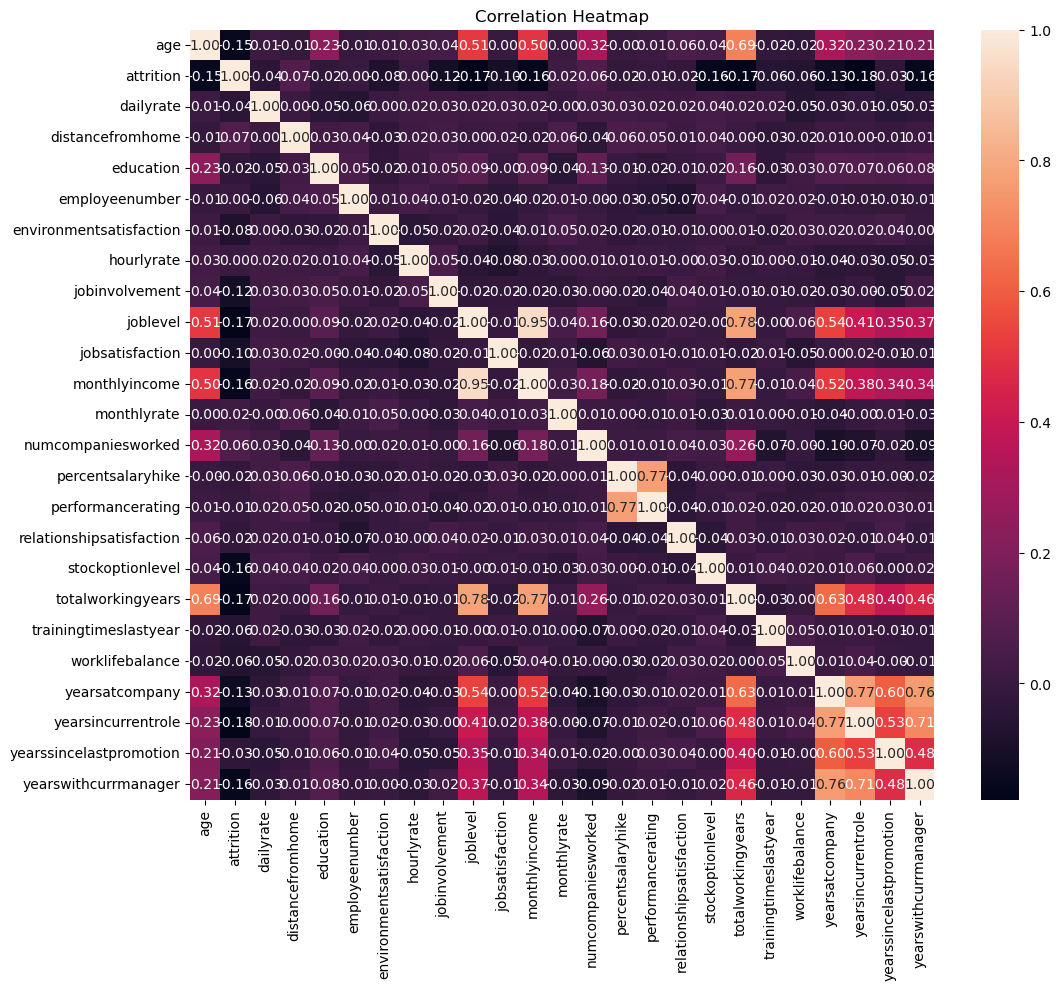

In [42]:
# Calculate correlation coefficients
correlation_matrix = df_full_train[numerical_columns].corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [43]:
# Extract positive and negative correlations with the target variable
positive_corr_features = correlation_matrix[correlation_matrix['attrition'] > 0].index.tolist()
negative_corr_features = correlation_matrix[correlation_matrix['attrition'] < 0].index.tolist()

# Display selected features
print("Features with Positive Correlation:", positive_corr_features)
print("Features with Negative Correlation:", negative_corr_features)

Features with Positive Correlation: ['attrition', 'distancefromhome', 'employeenumber', 'hourlyrate', 'monthlyrate', 'numcompaniesworked']
Features with Negative Correlation: ['age', 'dailyrate', 'education', 'environmentsatisfaction', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


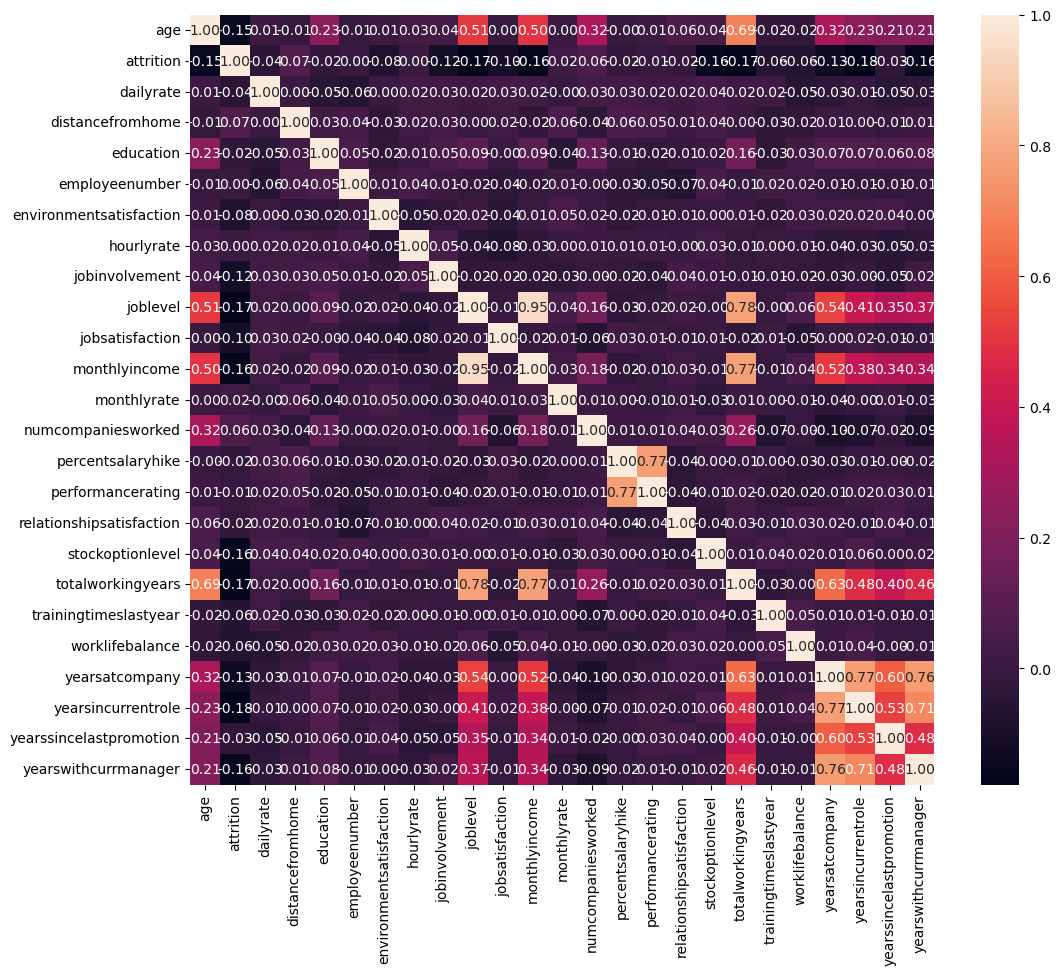

Highly correlated features: ['age', 'attrition', 'joblevel', 'monthlyincome', 'stockoptionlevel', 'totalworkingyears', 'yearsatcompany', 'yearsincurrentrole', 'yearswithcurrmanager']


In [44]:
# Display a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

# Set a correlation threshold based on visual inspection and domain knowledge
correlation_threshold = 0.13

# Identify features with high correlation with the target variable
high_corr_features = correlation_matrix[abs(correlation_matrix['attrition']) > correlation_threshold].index.tolist()

# Display selected features
print("Highly correlated features:", high_corr_features)

In [45]:
# Set a correlation threshold based on visual inspection and domain knowledge
correlation_threshold = 0.14

# Identify features with high correlation with the target variable
high_corr_features = correlation_matrix[abs(correlation_matrix['attrition']) > correlation_threshold].index.tolist()

# Display selected features
print("Highly correlated features:", high_corr_features)

Highly correlated features: ['age', 'attrition', 'joblevel', 'monthlyincome', 'stockoptionlevel', 'totalworkingyears', 'yearsincurrentrole', 'yearswithcurrmanager']


## One-Hot Encoding

In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
num_ohe = high_corr_features.copy()
num = ['age', 'joblevel', 'monthlyincome', 'stockoptionlevel', 'totalworkingyears', 'yearsincurrentrole', 'yearswithcurrmanager']
num

['age',
 'joblevel',
 'monthlyincome',
 'stockoptionlevel',
 'totalworkingyears',
 'yearsincurrentrole',
 'yearswithcurrmanager']

In [48]:
cat_3head = df_mi.head(3).index
cat_3head

Index(['overtime', 'jobrole', 'maritalstatus'], dtype='object')

In [49]:
cat = ['overtime', 'jobrole', 'maritalstatus']
cat

['overtime', 'jobrole', 'maritalstatus']

In [50]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[cat + num].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [51]:
X_train.shape

(882, 21)

In [52]:
X_train[0]

array([4.50e+01, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 1.00e+00, 4.85e+03, 1.00e+00, 0.00e+00, 0.00e+00,
       8.00e+00, 3.00e+00, 1.00e+00])

In [53]:
dv.get_feature_names_out()

array(['age', 'joblevel', 'jobrole=healthcare_representative',
       'jobrole=human_resources', 'jobrole=laboratory_technician',
       'jobrole=manager', 'jobrole=manufacturing_director',
       'jobrole=research_director', 'jobrole=research_scientist',
       'jobrole=sales_executive', 'jobrole=sales_representative',
       'maritalstatus=divorced', 'maritalstatus=married',
       'maritalstatus=single', 'monthlyincome', 'overtime=no',
       'overtime=yes', 'stockoptionlevel', 'totalworkingyears',
       'yearsincurrentrole', 'yearswithcurrmanager'], dtype=object)

## Training the Models
<p>Scikit-Learn covers a wide of machine learning algorithms ranging from Classification, Regression, Clustering and other      </p>
* Scikit-learn API: Dataset Representation - Muitiple indepedent variables and 
  the Target variable represented as [(X1, X2, X3, X4, ....Xn), (Y)]
* Scikit-learn API: Predicators: Implemented to generate predictions for the unknown test data and also provides a score as a     scalar value for the test input provided. Such value can be used in the future for tunning the ML Models.


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
X_train.shape

(882, 21)

In [56]:
y_train.shape

(882,)

In [57]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [58]:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [59]:
model.predict_proba(X_val)

array([[0.90536868, 0.09463132],
       [0.94055134, 0.05944866],
       [0.63799219, 0.36200781],
       [0.54652124, 0.45347876],
       [0.91664226, 0.08335774],
       [0.90802447, 0.09197553],
       [0.51433694, 0.48566306],
       [0.84911065, 0.15088935],
       [0.93214368, 0.06785632],
       [0.82316464, 0.17683536],
       [0.75272981, 0.24727019],
       [0.9667678 , 0.0332322 ],
       [0.91697784, 0.08302216],
       [0.90425403, 0.09574597],
       [0.94795581, 0.05204419],
       [0.92329759, 0.07670241],
       [0.79033927, 0.20966073],
       [0.82479294, 0.17520706],
       [0.89927907, 0.10072093],
       [0.91313733, 0.08686267],
       [0.81869001, 0.18130999],
       [0.40640499, 0.59359501],
       [0.78553938, 0.21446062],
       [0.77721291, 0.22278709],
       [0.87761561, 0.12238439],
       [0.98600039, 0.01399961],
       [0.495281  , 0.504719  ],
       [0.94181027, 0.05818973],
       [0.80413931, 0.19586069],
       [0.67133317, 0.32866683],
       [0.

In [60]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.09463132, 0.05944866, 0.36200781, 0.45347876, 0.08335774,
       0.09197553, 0.48566306, 0.15088935, 0.06785632, 0.17683536,
       0.24727019, 0.0332322 , 0.08302216, 0.09574597, 0.05204419,
       0.07670241, 0.20966073, 0.17520706, 0.10072093, 0.08686267,
       0.18130999, 0.59359501, 0.21446062, 0.22278709, 0.12238439,
       0.01399961, 0.504719  , 0.05818973, 0.19586069, 0.32866683,
       0.04524956, 0.20300358, 0.24758093, 0.07355956, 0.30416678,
       0.04766685, 0.09812165, 0.05810723, 0.04850074, 0.2777099 ,
       0.12777294, 0.04021228, 0.06584231, 0.22199765, 0.10314545,
       0.04714637, 0.1939261 , 0.11048117, 0.04293864, 0.07957623,
       0.70826001, 0.32298014, 0.42719638, 0.06588172, 0.0832421 ,
       0.12499962, 0.26481474, 0.0740869 , 0.4619654 , 0.03535981,
       0.29564224, 0.01972272, 0.28424677, 0.17130602, 0.03801844,
       0.13859782, 0.46829143, 0.65092786, 0.08897397, 0.09455087,
       0.29795253, 0.1388421 , 0.03585357, 0.08213561, 0.01577

In [61]:
attrition = y_pred > 0.5

In [62]:
(y_val == attrition).mean()

0.8571428571428571

## Model Interpretation

In [63]:
model.intercept_[0]

0.032012141959078595

In [64]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': -0.011,
 'joblevel': -0.024,
 'jobrole=healthcare_representative': -0.168,
 'jobrole=human_resources': 0.071,
 'jobrole=laboratory_technician': 0.144,
 'jobrole=manager': -0.018,
 'jobrole=manufacturing_director': -0.098,
 'jobrole=research_director': -0.047,
 'jobrole=research_scientist': -0.168,
 'jobrole=sales_executive': 0.117,
 'jobrole=sales_representative': 0.2,
 'maritalstatus=divorced': -0.246,
 'maritalstatus=married': -0.06,
 'maritalstatus=single': 0.338,
 'monthlyincome': -0.0,
 'overtime=no': -0.652,
 'overtime=yes': 0.684,
 'stockoptionlevel': -0.555,
 'totalworkingyears': 0.019,
 'yearsincurrentrole': -0.069,
 'yearswithcurrmanager': -0.047}

## Testing - Using the Model

In [65]:
employee = {'businesstravel': 'travel_rarely',
 'department': 'sales',
 'educationfield': 'life_sciences',
 'gender': 'female',
 'jobrole': 'sales_executive',
 'maritalstatus': 'single',
 'over18': 'y',
 'overtime': 'no',
 'age': 45,
 'dailyrate': 374,
 'distancefromhome': 20,
 'education': 3,
 'employeecount': 1,
 'employeenumber': 2046,
 'environmentsatisfaction': 4,
 'hourlyrate': 50,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 3,
 'monthlyincome': 4850,
 'monthlyrate': 23333,
 'numcompaniesworked': 8,
 'percentsalaryhike': 15,
 'performancerating': 3,
 'relationshipsatisfaction': 3,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 8,
 'trainingtimeslastyear': 3,
 'worklifebalance': 3,
 'yearsatcompany': 5,
 'yearsincurrentrole': 3,
 'yearssincelastpromotion': 0,
 'yearswithcurrmanager': 1,
}

In [66]:
X_test = dv.transform([employee])
model.predict_proba(X_test)[0, 1]

0.22195944036752932

* Employee details used predicted to remain with the company

In [67]:
print(list(X_test[0]))

[45.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 4850.0, 1.0, 0.0, 0.0, 8.0, 3.0, 1.0]


##  Model Evaluation and Tuning

### Accuracy and dummy model
<p>      </p>

*

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
len(y_val)

294

In [70]:
accuracy_score(y_val, y_pred >= 0.5)

0.8571428571428571

In [71]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [72]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.170
0.05 0.323
0.10 0.554
0.15 0.653
0.20 0.752
0.25 0.813
0.30 0.837
0.35 0.847
0.40 0.840
0.45 0.864
0.50 0.857
0.55 0.867
0.60 0.857
0.65 0.850
0.70 0.837
0.75 0.830
0.80 0.830
0.85 0.830
0.90 0.830
0.95 0.830
1.00 0.830


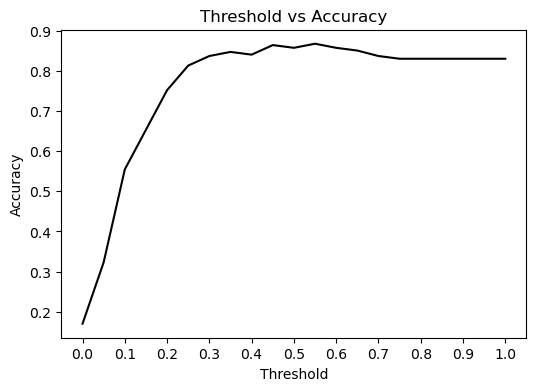

In [73]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

## Confusion Table

In [74]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [75]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[239,   5],
       [ 37,  13]])

In [76]:
confusion_table / confusion_table.sum()

array([[0.81292517, 0.0170068 ],
       [0.12585034, 0.04421769]])

## Precision and Recall

In [77]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.7222222222222222, 0.26)

## ROC and AUC

TPR and FPR

In [78]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [79]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,50,244,0,0
10,0.1,44,125,6,119
20,0.2,34,57,16,187
30,0.3,26,24,24,220
40,0.4,17,14,33,230
50,0.5,13,5,37,239
60,0.6,8,0,42,244
70,0.7,2,0,48,244
80,0.8,0,0,50,244
90,0.9,0,0,50,244


In [80]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [81]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,50,244,0,0,1.00,1.000000
10,0.1,44,125,6,119,0.88,0.512295
20,0.2,34,57,16,187,0.68,0.233607
30,0.3,26,24,24,220,0.52,0.098361
40,0.4,17,14,33,230,0.34,0.057377
50,0.5,13,5,37,239,0.26,0.020492
60,0.6,8,0,42,244,0.16,0.000000
70,0.7,2,0,48,244,0.04,0.000000
80,0.8,0,0,50,244,0.00,0.000000
90,0.9,0,0,50,244,0.00,0.000000


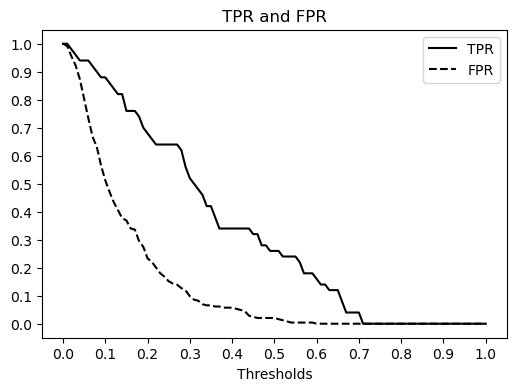

In [82]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

## Random baseline

In [83]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [84]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,50,244,0,0,1.00,1.000000
10,0.1,45,217,5,27,0.90,0.889344
20,0.2,35,197,15,47,0.70,0.807377
30,0.3,29,179,21,65,0.58,0.733607
40,0.4,26,158,24,86,0.52,0.647541
50,0.5,23,137,27,107,0.46,0.561475
60,0.6,15,108,35,136,0.30,0.442623
70,0.7,12,78,38,166,0.24,0.319672
80,0.8,8,58,42,186,0.16,0.237705
90,0.9,5,31,45,213,0.10,0.127049


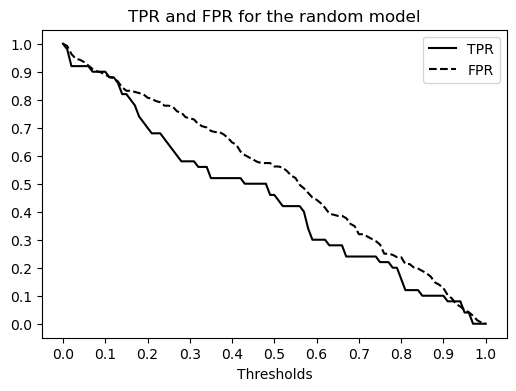

In [85]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

## Ideal baseline:

In [86]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,50,244,0,0,1.00,1.000000
10,0.1,50,214,0,30,1.00,0.877049
20,0.2,50,185,0,59,1.00,0.758197
30,0.3,50,156,0,88,1.00,0.639344
40,0.4,50,126,0,118,1.00,0.516393
50,0.5,50,97,0,147,1.00,0.397541
60,0.6,50,68,0,176,1.00,0.278689
70,0.7,50,38,0,206,1.00,0.155738
80,0.8,50,9,0,235,1.00,0.036885
90,0.9,30,0,20,244,0.60,0.000000


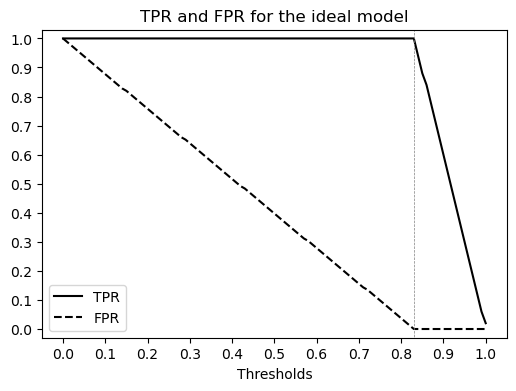

In [87]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

# plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

## ROC Curve

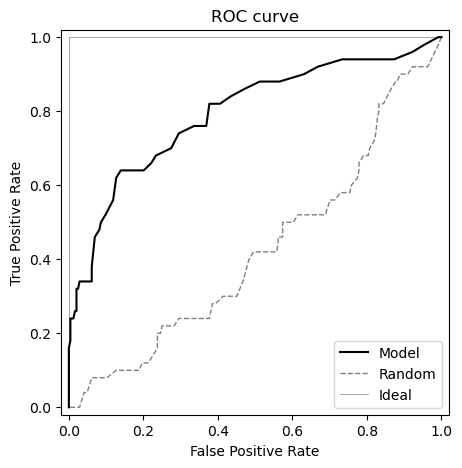

In [88]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

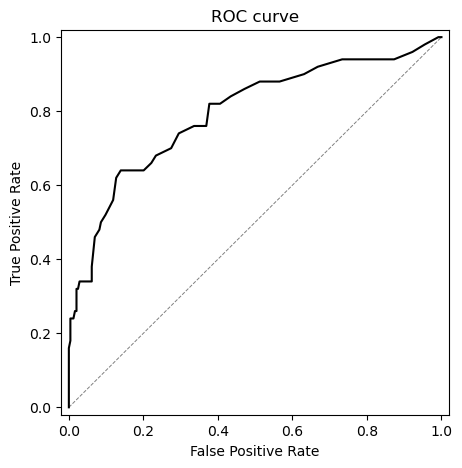

In [89]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve.svg')

plt.show()

## Using Scikit-Learn for plotting the ROC curve

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [91]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

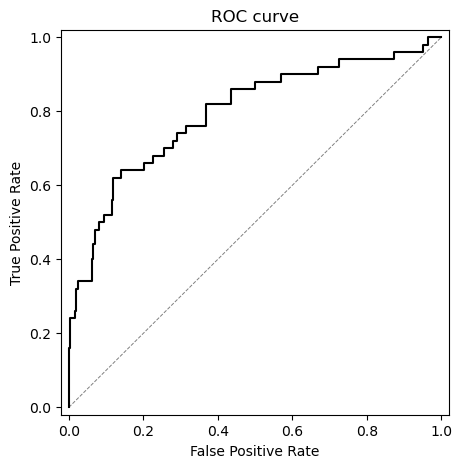

In [92]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## AUC: Area under the ROC curve

In [93]:
# df_scores_small = tpr_fpr_dataframe(y_val, y_pred_small)

In [94]:
auc(df_scores.fpr, df_scores.tpr)

0.794139344262295

In [95]:
# auc(df_scores_small.fpr, df_scores_small.tpr)

## Comparing multiple models with ROC curves

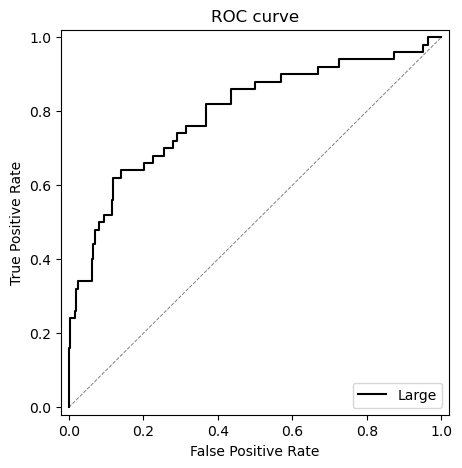

In [96]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
#fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', linestyle='solid', label='Large')
#plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')

plt.show()

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
roc_auc_score(y_val, y_pred)

0.7946721311475411

In [99]:
# roc_auc_score(y_val, y_pred_small)

Interpretation of AUC: the probability that a randomly chosen positive example
ranks higher than a randomly chosen negative example

In [100]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.7958

## Tuning the parameter `C`

In [101]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat + num].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [102]:
dv, model = train(df_train, y_train, C=0.001)

In [103]:
def predict(df, dv, model):
    dicts = df[cat + num].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [104]:
y_pred = predict(df_val, dv, model)

In [105]:
from sklearn.model_selection import KFold

In [106]:
!pip install tqdm

In [107]:
from tqdm.auto import tqdm

In [108]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.attrition.values
        y_val = df_val.attrition.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.699 +- 0.017
C=0.01 0.763 +- 0.005
C=0.1 0.786 +- 0.010
C=0.5 0.788 +- 0.011
C=1 0.784 +- 0.011
C=5 0.786 +- 0.009
C=10 0.785 +- 0.010


In [109]:
scores

[0.7738970588235294,
 0.7859999999999999,
 0.7747368421052632,
 0.7889100428367445,
 0.8023686158401184]

## Full Retrain

In [110]:
dv, model = train(df_full_train, df_full_train.attrition.values, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.6643539467068879

In [111]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [112]:
aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.attrition.values

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.attrition.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [113]:
np.array(aucs).round(3)

array([0.928, 0.802, 0.735, 0.731, 0.839, 0.779, 0.68 , 0.826, 0.806,
       0.784])

In [114]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.791 ± 0.065


## Save Model

In [115]:
import pickle

In [116]:
with open ('hrAttrition_Log_model_v3.bin', 'wb') as f_out:
    pickle.dump((dv,model), f_out)